In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read CSV
gold_data = pd.read_csv("./Resources/gold.csv")
mortgage_data = pd.read_csv("./Resources/mortgage.csv")

In [4]:
gold_data.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
#Modify data
gold_data[['Year','Month']] = gold_data.Date.str.split("-",expand=True)
gold_df = gold_data[['Year', 'Month', 'Price']]
gold_df

,Year,Month,Price
0,1950,01,34.730
1,1950,02,34.730
2,1950,03,34.730
3,1950,04,34.730
4,1950,05,34.730
...,...,...,...
842,2020,03,1593.764
843,2020,04,1680.030
844,2020,05,1715.697
845,2020,06,1734.032


In [6]:
#Groupby year gold price
gold_year = gold_df.groupby("Year").mean()
gold_year = gold_year.reset_index()
gold_year

,Year,Price
0,1950,34.729167
1,1951,34.717500
2,1952,34.628333
3,1953,34.879167
4,1954,35.020000
...,...,...
66,2016,1248.161833
67,2017,1257.848583
68,2018,1269.852583
69,2019,1392.585750


In [7]:
mortgage_data.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [8]:
#Modify Data
mortgage_int = mortgage_data[["Year", "Effective Federal Funds Rate"]]
mortgage_int.dropna()


,Year,Effective Federal Funds Rate
0,1954,0.80
1,1954,1.22
2,1954,1.06
3,1954,0.85
4,1954,0.83
...,...,...
896,2016,0.40
897,2016,0.41
898,2016,0.54
900,2017,0.65


In [9]:
#Group by year federal rate
mortgage_year = mortgage_int.groupby("Year").mean()
mortgage_year = mortgage_year.reset_index()
mortgage_year

,Year,Effective Federal Funds Rate
0,1954,1.006667
1,1955,1.785000
2,1956,2.728333
3,1957,3.105000
4,1958,1.572500
...,...,...
59,2013,0.107500
60,2014,0.089167
61,2015,0.132500
62,2016,0.395000


In [10]:
#Change type for merge
gold_year["Year"] = gold_year["Year"].astype(str)
mortgage_year["Year"] = mortgage_year["Year"].astype(str)

In [11]:
#Merge data
merged_data = pd.merge(mortgage_year, gold_year, how="inner", on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True)
merged_data

,Year,Effective Federal Funds Rate,Price
0,1954,1.006667,35.020000
1,1955,1.785000,35.023333
2,1956,2.728333,34.987500
3,1957,3.105000,34.947500
4,1958,1.572500,35.091667
...,...,...,...
59,2013,0.107500,1410.800167
60,2014,0.089167,1266.335667
61,2015,0.132500,1160.591000
62,2016,0.395000,1248.161833


In [87]:
#reset index
merged_data = merged_data.set_index("Year")
merged_data

KeyError: "None of ['Year'] are in the columns"

# Bar Graph
Check yearly change of Gold price and Federal funds rate

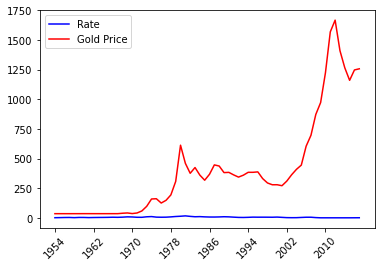

In [77]:
# plt.figure(figsize=(80,40))
rate, = plt.plot(merged_data["Effective Federal Funds Rate"], color="blue", label = "Rate")
price, = plt.plot(merged_data["Price"], color="Red", label = "Gold Price")
plt.xticks(merged_data.index, rotation = 45, fontsize=10)
plt.legend(handles=[rate, price], loc="best")
plt.locator_params(axis= "x" , nbins = 8)
# plt.savefig('project1.png', dpi=1200)
plt.show()

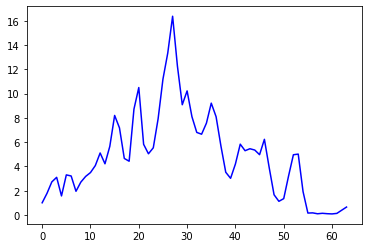

In [14]:
plt.plot(merged_data["Effective Federal Funds Rate"], color="blue", label = "Rate")



# Scatter Plot
    A graph of plotted points that show the relationship between two sets of data

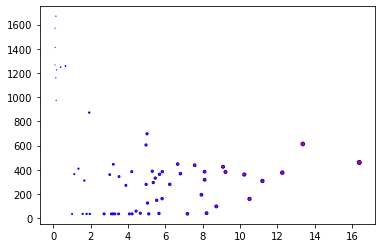

In [86]:
plt.scatter(merged_data["Effective Federal Funds Rate"],merged_data["Price"],marker="o", facecolors="red", edgecolors="blue", s = merged_data["Effective Federal Funds Rate"] )